In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pandas import DataFrame
import scipy.stats as stats

In [47]:

TCSR_an_path = "NC_Files/Tot Constr Spend Resi Annual index2002.csv"

NHSP_an_path = "NC_Files/Median Sales Price for New Houses Sold Annual index2002.csv"

HSP_an_path = "NC_Files/Median Sales Price of Houses Sold Annual index2002.csv"

Pop_an_path = "NC_Files/Population Annual index2002.csv"


In [48]:
data1 = pd.read_csv(TCSR_an_path)
Ta_data_df = pd.DataFrame(data1)
data2 = pd.read_csv(NHSP_an_path)
NHa_data_df = pd.DataFrame(data2)
data3 = pd.read_csv(HSP_an_path)
Ha_data_df = pd.DataFrame(data3)
data4 = pd.read_csv(Pop_an_path)
Pa_data_df = pd.DataFrame(data4)
NHa_data_df['DATE'] = NHa_data_df['DATE'].astype('datetime64[D]')
Ta_data_df['DATE'] = Ta_data_df['DATE'].astype('datetime64[D]')
Ha_data_df['DATE'] = Ha_data_df['DATE'].astype('datetime64[D]')
Pa_data_df['DATE'] = Pa_data_df['DATE'].astype('datetime64[D]')

In [49]:
merge1 = pd.merge(Ta_data_df, NHa_data_df, how="left", on=["DATE"])
merge1_df = pd.DataFrame(merge1)
merge1_df.head()

,DATE,TLRESCONS_NBD20020101,MSPNHS
0,2002-01-01,100.00000,100
1,2003-01-01,112.18848,103.43647
2,2004-01-01,133.78736,117.72283
3,2005-01-01,156.69656,126.58199
4,2006-01-01,153.80531,131.36963


In [50]:
merge2 = pd.merge(Ha_data_df, Pa_data_df, how="left", on=["DATE"])
merge2_df = pd.DataFrame(merge2)


TCSR_NHSP_HSP_Pop = pd.merge(merge1_df, merge2_df, how="left", on=["DATE"])
final_comb_df = pd.DataFrame(TCSR_NHSP_HSP_Pop)
final_comb_df.dropna(inplace=True)
final_comb_df

,DATE,TLRESCONS_NBD20020101,MSPNHS,MSPNHSUS_NBD20020101,POPTHM_NBD20020101
0,2002-01-01,100.00000,100,100.00000,100.00000
1,2003-01-01,112.18848,103.43647,103.43647,100.92781
2,2004-01-01,133.78736,117.72283,117.72283,101.84326
3,2005-01-01,156.69656,126.58199,126.58199,102.79153
4,2006-01-01,153.80531,131.36963,131.36963,103.77250
5,2007-01-01,123.88044,131.73445,131.73445,104.77214
6,2008-01-01,91.44695,124.52822,124.52822,105.76080
7,2009-01-01,65.13301,115.93028,115.93028,106.69741
8,2010-01-01,63.92207,119.57393,119.57393,107.59990
9,2011-01-01,63.59139,121.23587,121.23587,108.45295


In [51]:
final_comb_df.dtypes

DATE                     datetime64[ns]
TLRESCONS_NBD20020101            object
MSPNHS                           object
MSPNHSUS_NBD20020101            float64
POPTHM_NBD20020101               object
dtype: object

In [52]:
final_comb_df['TLRESCONS_NBD20020101'] = final_comb_df['TLRESCONS_NBD20020101'].astype(float)
final_comb_df['MSPNHS'] = final_comb_df['MSPNHS'].astype(float)
final_comb_df['POPTHM_NBD20020101'] = final_comb_df['POPTHM_NBD20020101'].astype(float)
final_comb_df.info()
final_comb_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   21 non-null     datetime64[ns]
 1   TLRESCONS_NBD20020101  21 non-null     float64       
 2   MSPNHS                 21 non-null     float64       
 3   MSPNHSUS_NBD20020101   21 non-null     float64       
 4   POPTHM_NBD20020101     21 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1008.0 bytes


,DATE,TLRESCONS_NBD20020101,MSPNHS,MSPNHSUS_NBD20020101,POPTHM_NBD20020101
0,2002-01-01,100.00000,100.00000,100.00000,100.00000
1,2003-01-01,112.18848,103.43647,103.43647,100.92781
2,2004-01-01,133.78736,117.72283,117.72283,101.84326
3,2005-01-01,156.69656,126.58199,126.58199,102.79153
4,2006-01-01,153.80531,131.36963,131.36963,103.77250
5,2007-01-01,123.88044,131.73445,131.73445,104.77214
6,2008-01-01,91.44695,124.52822,124.52822,105.76080
7,2009-01-01,65.13301,115.93028,115.93028,106.69741
8,2010-01-01,63.92207,119.57393,119.57393,107.59990
9,2011-01-01,63.59139,121.23587,121.23587,108.45295


Ttest_indResult(statistic=-2.0973382311706583, pvalue=0.042556241093287796)


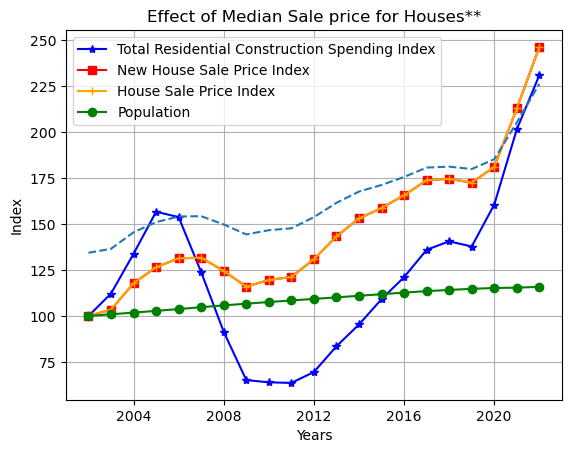

In [59]:
date = final_comb_df['DATE']
TCSR = final_comb_df['TLRESCONS_NBD20020101']
NHSP = final_comb_df["MSPNHS"]
HSP = final_comb_df['MSPNHSUS_NBD20020101']
P = final_comb_df['POPTHM_NBD20020101']

TCSR, = plt.plot(date, TCSR, marker="*",color="blue", label="Total Residential Construction Spending Index")
NHSP, = plt.plot(date, NHSP, marker="s", color="Red", label="New House Sale Price Index")
HSP = plt.plot(date, HSP, marker="+",color="orange", label="House Sale Price Index")
P = plt.plot(date, P, marker="o", color="green", label="Population Index")
plt.legend(loc="best")

plt.title("Effect of Median Sale price for Houses**")
plt.ylabel("Index")
plt.xlabel("Years")
plt.plot(date,fit, "--")
ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)

plt.grid()
NC_ = plt.gcf()
plt.show()
#NC_4.savefig("output_image/Fig1a.png")

Ttest_indResult(statistic=-2.0973382311706583, pvalue=0.042556241093287796)


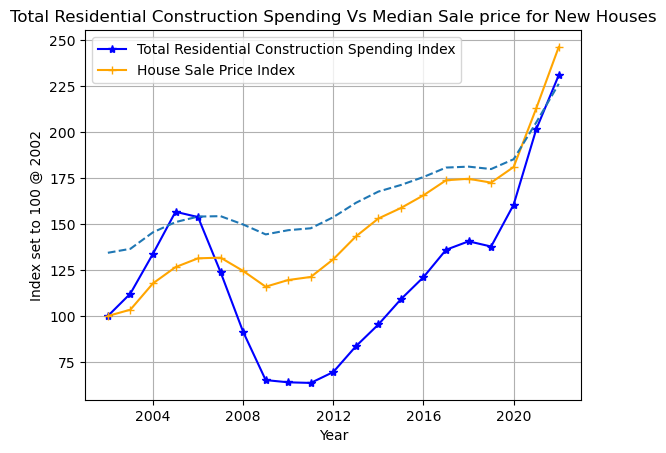

In [60]:
date = final_comb_df['DATE']
x = final_comb_df['TLRESCONS_NBD20020101']
#NHSP = final_comb_df["MSPNHS"]
y = final_comb_df['MSPNHSUS_NBD20020101']

TCSR, = plt.plot(date, x, marker="*",color="blue", label="Total Residential Construction Spending Index")
#NHSP, = plt.plot(date, NHSP, marker="s", color="Red", label="NHSP")
HSP = plt.plot(date, y, marker="+",color="orange", label="House Sale Price Index")

slope, int, r, p, std_err = st.linregress(x, y)
fit = slope * y + int

plt.title("Total Residential Construction Spending Vs Median Sale price for New Houses")
plt.ylabel("Index set to 100 @ 2002")
plt.xlabel("Year")
plt.plot(date,fit, "--")
ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)

plt.legend(loc="best")
plt.grid()
NC_1 = plt.gcf()
plt.show()


In [ ]:
date = TCSR_NHSP_HSP_Pa_df["DATE"]
TCSR = TCSR_NHSP_HSP_Pa_df["TLRESCONS_NBD20020101"]
NHSP = TCSR_NHSP_HSP_Pa_df["MSPNHSUS_NBD20020101_x"]
HSP = TCSR_NHSP_HSP_Pa_df["MSPNHSUS_NBD20020101_y"]
P = TCSR_NHSP_HSP_Pa_df["POPTHM_NBD20020101"]

TCSR = plt.plot(date, TCSR, marker="*",color="blue", label="TCSR")
NHSP = plt.plot(date, NHSP, marker="s", color="Red", label="NHSP")
HSP = plt.plot(date, HSP, marker="+",color="orange", label="HSP")
P = plt.plot(date, P, marker="o", color="yellow", label="Population")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
#final_comb_df['Adj Close**'] =dj['Adj Close**'].map(lambda x: float(x.replace(",", "")))
#final_comb_df['DATE'] = final_comb_df['DATE'].astype('datetime64[D]')
#final_comb_df['TLRESCONS_NBD20020101'] = final_comb_df['TLRESCONS_NBD20020101'].map(lambda x: float(x.replace(",", "")))
final_comb_df['TLRESCONS_NBD20020101'] = final_comb_df['TLRESCONS_NBD20020101'].astype(float)

final_comb_df['MSPNHS'] = final_comb_df['MSPNHS'].astype(float)
#final_comb_df['MSPNHSUS_NBD20020101'] = final_comb_df['MSPNHSUS_NBD20020101'].map(lambda x: float(x.replace(",", "")))
#final_comb_df['MSPNHSUS_NBD20020101'] = final_comb_df['MSPNHSUS_NBD20020101'].astype(float)

#final_comb_df['POPTHM_NBD20020101'] = final_comb_df['POPTHM_NBD20020101'].map(lambda x: float(x.replace(",", "")))
final_comb_df['POPTHM_NBD20020101'] = final_comb_df['POPTHM_NBD20020101'].astype(float)

#final_comb_df['year'] = pd.DatetimeIndex(final_comb_df['DATE']).year
#final_comb1_df =final_comb_df.groupby('year')[['TLRESCONS_NBD20020101', 'MSPNHSUS_NBD20020101', 'POPTHM_NBD20020101']].mean()
final_comb_df.info()
final_comb_df